In [57]:
import matplotlib.pyplot as plt 
import numpy as np

In [61]:
n_sbs = 100000
building_width = np.random.rand(n_sbs)*50 + 5
building_length = np.random.rand(n_sbs)*50 + 5
floor_2_floor_height = np.random.rand(n_sbs)*3 + 3
shared_perim_depth = np.random.rand(n_sbs)*2 + 4
shoebox_width = np.random.rand(n_sbs)*7+2

# Building computed properties
gfa = building_width * building_length
facade_area = (2*building_width + 2*building_length)*floor_2_floor_height
gfa_2_facade_area = gfa / facade_area

# shoeboxer dimensions
shoebox_facade_area = shoebox_width * floor_2_floor_height
total_shoebox_area = gfa_2_facade_area * shoebox_facade_area
total_shoebox_depth = total_shoebox_area / shoebox_width
shoeboxer_core_depth = total_shoebox_depth - shared_perim_depth
shoeboxer_core_frac = shoeboxer_core_depth / total_shoebox_depth

# Autozoner dimensions
autozoner_core_width = building_width - 2*shared_perim_depth
autozoner_core_length = building_length - 2*shared_perim_depth
autozoner_has_core = (autozoner_core_width > 0) & (autozoner_core_length > 0)
autozoner_core_area = autozoner_core_width * autozoner_core_length
autozoner_core_frac = autozoner_core_area / gfa
autozoner_perim_frac = 1 - autozoner_core_frac


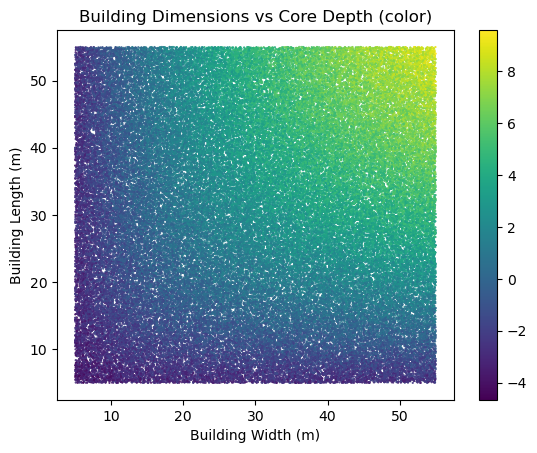

In [59]:
plt.title("Building Dimensions vs Core Depth (color)")
plt.xlabel("Building Width (m)")
plt.ylabel("Building Length (m)")
plt.scatter(building_width,building_length,c=shoeboxer_core_depth, s=0.3)
plt.colorbar()

Text(-10, -14, 'Perim depth ranges between 4m and 6m, resulting in noise in the no-core border')

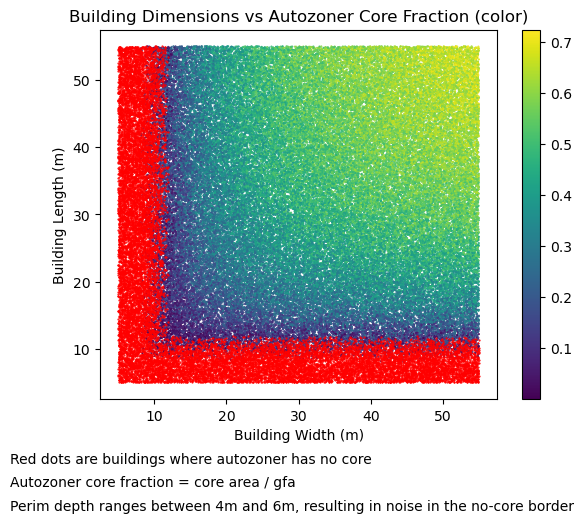

In [68]:
plt.title("Building Dimensions vs Autozoner Core Fraction (color)")
plt.xlabel("Building Width (m)")
plt.ylabel("Building Length (m)")
plt.scatter(building_width[autozoner_has_core],building_length[autozoner_has_core],c=autozoner_core_frac[autozoner_has_core], s=0.3)
plt.colorbar()
plt.scatter(building_width[~autozoner_has_core],building_length[~autozoner_has_core],c="red", s=0.3)
# add a note about the red dots
# plt.text(-10, -8, "Orange dots are buildings with 3m < total shoebox depth < 5m")
plt.text(-10, -7, "Red dots are buildings where autozoner has no core")
plt.text(-10, -10.5, "Autozoner core fraction = core area / gfa")
plt.text(-10, -14, "Perim depth ranges between 4m and 6m, resulting in noise in the no-core border")

Text(-10, -14, 'Green dots are buildings where autozoner has core but total shoebox depth < 5m')

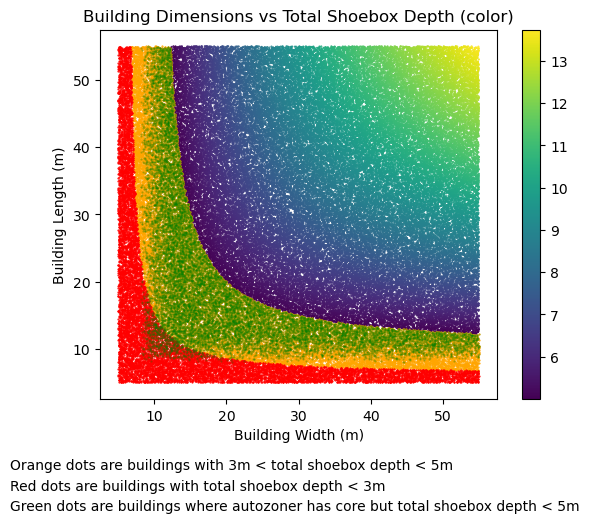

In [78]:
plt.title("Building Dimensions vs Total Shoebox Depth (color)")
plt.xlabel("Building Width (m)")
plt.ylabel("Building Length (m)")
shoebox_depth_mask = (total_shoebox_depth > 5)
shoebox_orange_mask = (~shoebox_depth_mask) & (total_shoebox_depth > 3)
shoebox_red_mask = total_shoebox_depth <=3
plt.scatter(building_width[shoebox_depth_mask],building_length[shoebox_depth_mask],c=total_shoebox_depth[shoebox_depth_mask], s=0.3)
plt.colorbar()
plt.scatter(building_width[shoebox_orange_mask],building_length[shoebox_orange_mask],c="orange", s=0.3)
plt.scatter(building_width[shoebox_red_mask],building_length[shoebox_red_mask],c="red", s=0.3)
plt.scatter(building_width[shoebox_red_mask & autozoner_has_core],building_length[shoebox_red_mask & autozoner_has_core],c="green", s=0.3,alpha=0.3)
plt.scatter(building_width[shoebox_orange_mask & autozoner_has_core],building_length[shoebox_orange_mask & autozoner_has_core],c="green", s=0.3, alpha=0.3)
# add a note about the red dots
plt.text(-10, -8, "Orange dots are buildings with 3m < total shoebox depth < 5m")
plt.text(-10, -11, "Red dots are buildings with total shoebox depth < 3m")
plt.text(-10, -14, "Green dots are buildings where autozoner has core but total shoebox depth < 5m")

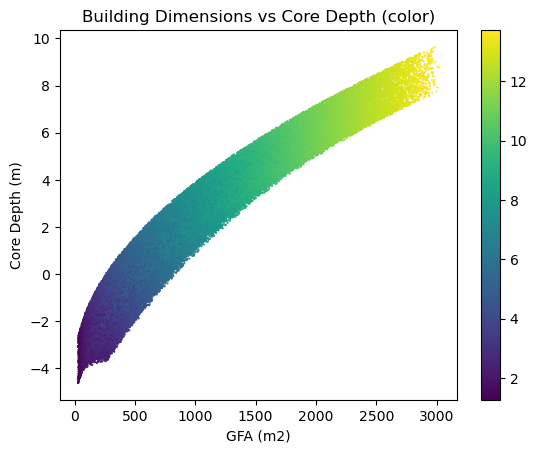

In [53]:

plt.title("Building Dimensions vs Core Depth (color)")
plt.xlabel("GFA (m2)")
plt.ylabel("Core Depth (m)")
plt.scatter(gfa,shoeboxer_core_depth,c=total_shoebox_depth, s=0.3)
plt.colorbar()
# plt.hist(core_depth, bins=100)
